In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)

In [ ]:
import requests
import pandas as pd

def get_show_id(api_key, show_name, base_url="https://api.themoviedb.org/3"):
    """Retrieve the TMDB show ID based on show name."""
    search_url = f"{base_url}/search/tv?api_key={api_key}&query={requests.utils.quote(show_name)}"
    response = requests.get(search_url)
    results = response.json().get('results', [])
    if not results:
        return None, None
    show_id = results[0]['id']
    return show_id, results[0].get('name', 'Unknown')

def fetch_imdb_id(api_key, show_id, base_url="https://api.themoviedb.org/3"):
    """Fetch IMDb ID for the show."""
    external_ids_url = f"{base_url}/tv/{show_id}/external_ids?api_key={api_key}"
    response = requests.get(external_ids_url)
    ids_data = response.json()
    return ids_data.get('imdb_id')

def fetch_cast_and_crew_details(api_key, show_id, base_url="https://api.themoviedb.org/3"):
    """Fetch cast and crew details for a show."""
    credits_url = f"{base_url}/tv/{show_id}/aggregate_credits?api_key={api_key}"
    response = requests.get(credits_url)
    credits_data = response.json()

    # Cast details
    cast = credits_data.get('cast', [])
    cast_summary = {actor['name']: f"{actor.get('roles', [{}])[0].get('character', 'Unknown Character')} ({actor.get('roles', [{}])[0].get('episode_count', 0)} Episodes)"
                    for actor in cast}

    # Crew details
    crew = credits_data.get('crew', [])
    crew_summary = {}
    for member in crew:
        for job in member.get('jobs', []):
            name = member['name']
            job_description = f"{job['job']} ({job['episode_count']} Episodes)"
            if name in crew_summary:
                crew_summary[name].add(job_description)
            else:
                crew_summary[name] = {job_description}
    for key in crew_summary:
        crew_summary[key] = "; ".join(sorted(crew_summary[key]))

    return cast_summary, len(cast), crew_summary, len(crew)

def summarize_show_credits(api_key, show_names):
    """Create a DataFrame summarizing credit details for multiple shows."""
    base_url = "https://api.themoviedb.org/3"
    data = []

    for show_name in show_names:
        show_id, actual_show_name = get_show_id(api_key, show_name, base_url)
        if show_id:
            imdb_id = fetch_imdb_id(api_key, show_id, base_url)
            cast_summary, cast_count, crew_summary, crew_count = fetch_cast_and_crew_details(api_key, show_id, base_url)
            data.append({
                'Show': actual_show_name,
                'IMDb ID': imdb_id,
                'Total Cast': cast_count,
                'Cast Details': cast_summary,
                'Total Crew': crew_count,
                'Crew Details': crew_summary
            })
        else:
            data.append({
                'Show': show_name,
                'IMDb ID': 'No data',
                'Total Cast': 'No data',
                'Cast Details': 'No data',
                'Total Crew': 'No data',
                'Crew Details': 'No data'
            })

    return pd.DataFrame(data)

# Fetch and display the data
api_key = '30190321fd22f1cbb363d873c33ef154'
shows = ["The Simpsons", "Seinfeld", "ER", "Friends", "South Park", "Sex and the City", "That '70s Show",
    "The King of Queens", "Will & Grace", "Family Guy", "Futurama", "Freaks and Geeks", "One Piece",
    "The Sopranos", "The West Wing", "Big Brother", "CSI: Crime Scene Investigation", "Curb Your Enthusiasm",
    "Survivor", "Malcolm in the Middle", "Girlfriends", "Gilmore Girls", "Star Trek: Enterprise", "24", "Alias",
    "Band of Brothers", "Justice League", "Scrubs", "Six Feet Under", "The Office", "Trailer Park Boys",
    "Lizzie McGuire", "Degrassi: The Next Generation", "Smallville", "Reba", "The Blue Planet", "American Idol",
    "The Bachelor", "Firefly", "Monk", "The Shield", "The Wire", "Top Gear France", "Everwood", "What I Like About You",
    "NCIS", "The Bachelorette", "Angels in America", "Arrested Development", "Battlestar Galactica", "Chappelles Show",
    "The League", "The O.C.", "State of Play", "Dead Like Me", "Nip/Tuck", "One Tree Hill", "That's So Raven",
    "The Simple Life", "Deadwood", "Desperate Housewives", "Drake & Josh", "House", "Lost", "Monster",
    "Samurai Champloo", "The Venture Bros.", "Entourage", "Boston Legal", "Veronica Mars", "Laguna Beach",
    "American Dad!", "Criminal Minds", "Doctor Who", "Greys Anatomy", "Its Always Sunny in Philadelphia",
    "Avatar: The Last Airbender", "Bones", "How I Met Your Mother", "My Name is Earl", "Prison Break", "Rome",
    "Supernatural", "The Closer", "Weeds", "The Comeback", "Top Chef", "30 Rock", "Death Note",
    "Dexter", "Friday Night Lights", "Psych", "Big Love", "Heroes", "The Game", "Torchwood", "The Hills",
    "Brothers & Sisters", "Ugly Betty", "Planet Earth", "Gossip Girl", "Keeping Up with the Kardashians", "Mad Men",
    "Naruto: Shippuden", "The Big Bang Theory", "Starz", "Pushing Daisies", "Skins", "Chuck", "Dirty Sexy Money",
    "Samantha Who?", "The Real Housewives of Atlanta", "The Real Housewives of New York City", "Star Wars: The Clone Wars",
    "Breaking Bad", "Sons of Anarchy", "The Mentalist", "True Blood", "Generation Kill", "John Adams",
    "NCIS: Los Angeles", "RuPaul's Drag Race", "The Real Housewives of New Jersey", "Archer", "Castle",
    "Community", "Fullmetal Alchemist: Brotherhood", "Glee", "Modern Family", "Parks and Recreation", "Party Down",
    "The Good Wife", "The Vampire Diaries", "Dollhouse", "Jersey Shore", "Men of a Certain Age", "Eastbound and Down",
    "Life", "Blue Bloods", "The Real Housewives of Beverly Hills", "The Walking Dead", "Adventure Time", "Blue Mountain State",
    "Boardwalk Empire", "Downton Abbey", "Hawaii Five-0", "Justified", "Luther", "Pretty Little Liars", "Regular Show",
    "Sherlock", "Spartacus", "Parenthood", "Treme", "Terriers", "Louie", "The Pacific", "Through the Wormhole",
    "American Horror Story", "Black Mirror", "Bobs Burgers", "The Real Housewives of Miami", "The Voice", "11.22.63",
    "Game of Thrones", "Homeland", "New Girl", "Once Upon a Time", "Shameless", "Suits", "Teen Wolf",
    "Enlightened", "Frozen Planet", "Human Planet", "Chicago Fire", "RuPauls Drag Race All Stars", "Arrow", "Girls",
    "Gravity Falls", "Jojo's Bizarre Adventure", "Key & Peele", "Scandal", "Sword Art Online", "The Legend of Korra",
    "Veep", "Rick and Morty", "The Blacklist", "Agents of S.H.I.E.L.D.", "Bates Motel", "Brooklyn Nine-Nine", "Hannibal",
    "House of Cards", "Nathan for You", "Orange Is the New Black", "Peaky Blinders", "The Americans", "The Great",
    "The Originals", "Vikings", "Banshee", "Steven Universe", "Rectify", "Orphan Black", "Bachelor in Paradise",
    "Chicago P.D.", "Fargo", "True Detective", "Gotham", "Star Wars Rebels", "The Flash", "BoJack Horseman",
    "Halt and Catch Fire", "How to Get Away with Murder", "Jane the Virgin", "The 100", "The Affair", "The Leftovers",
    "Transparent", "You're the Worst", "Broad City", "Olive Kitteridge", "Penny Dreadful", "Silicon Valley", "The Knick",
    "Cosmos: A Spacetime Odyssey", "Chicago Med", "One-Punch Man", "Fear the Walking Dead", "Marvel's Jessica Jones",
    "Marvels Daredevil", "Supergirl", "Attack on Titan", "Better Call Saul", "Blindspot", "Dragon Ball Super", "Empire",
    "Making a Murderer", "Mr. Robot", "Narcos", "Quantico", "Schitt's Creek", "The Expanse", "Unbreakable Kimmy Schmidt",
    "Master of None", "Catastrophe", "Crazy Ex-Girlfriend", "Show Me a Hero", "The Jinx: The Life and Deaths of Robert Durst",
    "American Crime Story", "Stranger Things", "DC's Legends of Tomorrow", "Love & Death", "Atlanta", "Billions",
    "Fleabag", "Hunter x Hunter", "Letterkenny", "Lucifer", "Shadowhunters", "The Crown", "The Good Place", "The Grand Tour",
    "The Night Of", "This Is Us", "Westworld", "Baskets", "Vice Principals", "Better Things", "The OA", "The Young Pope",
    "Planet Earth II", "Big Mouth", "The Good Doctor", "Young Sheldon", "Star Trek: Discovery", "The Defenders", "The Punisher",
    "13 Reasons Why", "A Series of Unfortunate Events", "Big Little Lies", "Dark", "Dynasty", "MINDHUNTER", "Money Heist",
    "Ozark", "Riverdale", "The Handmaids Tale", "The Marvelous Mrs. Maisel", "The Deuce", "Brockmire", "Twin Peaks: The Return",
    "Godless", "The Good Fight", "GLOW", "Legion", "Blue Planet II", "The Vietnam War", "Cobra Kai", "FBI", "grown-ish",
    "My Brilliant Friend", "The Rookie", "Tom Clancys Jack Ryan", "You", "The Neighborhood", "Yellowstone", "All American",
    "Barry", "Chilling Adventures of Sabrina", "Maniac", "Manifest", "Sharp Objects", "Succession", "The Haunting of Hill House",
    "Pose", "Escape at Dannemore", "Homecoming", "Bodyguard", "Patrick Melrose", "Killing Eve",
    "Waco", "Demon Slayer: Kimetsu no Yaiba", "Euphoria", "Formula 1: Drive to Survive", "Good Omens", "Love, Death & Robots",
    "Sex Education", "The Boys", "The Chosen", "The Morning Show", "The Umbrella Academy", "The Witcher", "What We Do in the Shadows",
    "The Mandalorian", "Harley Quinn", "The Other Two", "See", "Watchmen", "Catch-22", "Unbelievable", "Chernobyl", "When They See Us",
    "Seven Worlds One Planet", "Bridgerton", "Emily in Paris", "Law & Order", "Law & Order: Special Victims Unit", "Love Is Blind",
    "Outer Banks", "Ted Lasso", "Star Trek: Picard", "Your Honor", "I Know This Much Is True", "Jujutsu Kaisen", "The Last Dance",
    "The Queen's Gambit", "Tiger King", "Cheer", "How to with John Wilson", "The Right Stuff", "Abbott Elementary", "And Just Like That...",
    "Arcane", "BMF", "Foundation", "Hacks", "Invincible", "Law & Order: Organized Crime", "Nine Perfect Strangers",
    "Only Murders in the Building", "The Sex Lives of College Girls", "The Upshaws", "The Wheel of Time", "The White Lotus", "Yellowjackets",
    "Squid Game", "The Equalizer", "1883", "Loki", "Star Wars: The Bad Batch", "Superman & Lois", "The Book of Boba Fett",
    "The Falcon and the Winter Soldier", "WandaVision", "American Auto", "Cruel Summer", "Dexter: New Blood", "Mare of Easttown",
    "Reservation Dogs", "Station Eleven", "The Underground Railroad", "Dopesick", "From", "Halo", "Heartstopper", "House of the Dragon",
    "Interview with the Vampire", "Pretty Little Liars: Original Sin", "Reacher", "Severance", "Slow Horses", "The Bear", "The Challenge: USA",
    "The Gilded Age", "The Kardashians", "The Lord of the Rings: The Rings of Power", "The Rehearsal", "Tokyo Vice", "Wednesday",
    "Welcome to Wrexham", "1923", "Andor", "Moon Knight", "Obi-Wan Kenobi", "She-Hulk: Attorney at Law", "Star Trek: Strange New Worlds",
    "The Sandman", "The Afterparty", "Willow", "1899", "Dahmer - Monster: The Jeffrey Dahmer Story", "The Offer", "The Witcher: Blood Origin",
    "We Own This City", "Black Bird", "IMPACT x Nightline", "Prehistoric Planet", "WeCrashed", "Blue Eye Samurai", "Frasier",
    "Gen V", "Hijack", "Monarch: Legacy of Monsters", "Percy Jackson & the Olympians", "Platonic", "Poker Face", "Scavengers Reign",
    "Shrinking", "Silo", "Squid Game: The Challenge", "The Curse", "The Golden Bachelor", "The Last of Us", "The Last Thing He Told Me",
    "The Night Agent", "The Traitors", "Twisted Metal", "Ahsoka", "Lawmen: Bass Reeves", "Secret Invasion", "The Walking Dead: Daryl Dixon",
    "City on Fire", "Dead Ringers", "Full Circle", "Goosebumps", "Queen Charlotte: A Bridgerton Story", "The Changeling", "The Consultant",
    "The Continental", "The Crowded Room", "The Idol", "The Fall of the House of Usher", "A Small Light",
    "All the Light We Cannot See", "Chimp Empire", "Lessons in Chemistry", "Painkiller", "Waco: The Aftermath", "White House Plumbers",
    "The Acolyte", "3 Body Problem", "Constellation", "Expats", "Fallout", "Griselda", "Mr. & Mrs. Smith",
    "Palm Royale", "Shogun", "ted", "Echo", "The Walking Dead: The Ones Who Live", "X-Men '97", "Masters of the Air"
]
df_cast_crew_tmdb = summarize_show_credits(api_key, shows)
df_cast_crew_tmdb.to_csv("tv_shows_cast_and_crew_details.csv", index=False)


In [ ]:
df_cast_crew_tmdb.shape

(483, 6)

In [ ]:
import pandas as pd

# Create a dictionary to map from DataFrame show names to your preferred list
name_mapping = {
    'Degrassi: The Next Generation': 'Degrassi',
    #'Top Gear': 'Top Gear France',
    "Chappelles Show": "Chappelle's Show",
    'Greys Anatomy': "Grey's Anatomy",
    "Its Always Sunny in Philadelphia": "It's Always Sunny in Philadelphia",
    'Brothers & Sisters': 'Brothers and Sisters',
    'Naruto: Shippuden': 'Naruto Shippūden',
    'Starz': 'Starzinger',
    'Jersey Shore': 'Jersey Shore: Family Vacation',
    'Eastbound and Down': 'Eastbound & Down',
    'Bobs Burgers': "Bob's Burgers",
    'RuPauls Drag Race All Stars': "RuPaul's Drag Race All Stars",
    'Agents of S.H.I.E.L.D.': "Marvel's Agents of S.H.I.E.L.D.",
    'Cosmos: A Spacetime Odyssey': 'Cosmos',
    'Marvels Daredevil': "Marvel's Daredevil",
    'Dragon Ball Super': 'Super Dragon Ball Heroes',
    'The Night Of': 'Heirs of the Night',
    'The Punisher': "Marvel's The Punisher",
    'The Handmaids Tale': "The Handmaid's Tale",
    'Twin Peaks: The Return': 'Twin Peaks',
    'Tom Clancys Jack Ryan': "Tom Clancy's Jack Ryan",
    'Escape at Dannemore': 'Escape at Dannemora',
    'Andor': 'Star Wars: Andor',
    'Percy Jackson & the Olympians': 'Percy Jackson and the Olympians',
    'The Continental': 'The Continental: From the World of John Wick',
    'Shogun': 'Shōgun'
}

# Apply the mapping to the 'Show' column of your DataFrame
df_cast_crew_tmdb['Show'] = df_cast_crew_tmdb['Show'].map(name_mapping).fillna(df_cast_crew_tmdb['Show'])


In [ ]:
import requests
import pandas as pd

api_key = '30190321fd22f1cbb363d873c33ef154'
base_url = "https://api.themoviedb.org/3"
search_url = f"{base_url}/search/tv?api_key={api_key}&query="

def get_video_url(video):
    """Generate a full URL for a video based on its site and key."""
    if video['site'] == "YouTube":
        return f"https://www.youtube.com/watch?v={video['key']}"
    elif video['site'] == "Vimeo":
        return f"https://vimeo.com/{video['key']}"
    else:
        return None  # Unknown video site

def get_additional_details(show_id):
    # Get videos
    videos_url = f"{base_url}/tv/{show_id}/videos?api_key={api_key}"
    videos_resp = requests.get(videos_url)
    videos_data = videos_resp.json().get('results', [])
    videos = [get_video_url(video) for video in videos_data if get_video_url(video) is not None]

    # Get external IDs
    external_ids_url = f"{base_url}/tv/{show_id}/external_ids?api_key={api_key}"
    external_ids_resp = requests.get(external_ids_url)
    external_ids_data = external_ids_resp.json()

    # Get keywords
    keywords_url = f"{base_url}/tv/{show_id}/keywords?api_key={api_key}"
    keywords_resp = requests.get(keywords_url)
    keywords_data = keywords_resp.json().get('results', [])
    keywords = ", ".join([keyword['name'] for keyword in keywords_data])

    return {
        "Videos": ", ".join(videos),
        "IMDb ID": external_ids_data.get("imdb_id", "N/A"),
        "TVDB ID": external_ids_data.get("tvdb_id", "N/A"),
        "Instagram ID": external_ids_data.get("instagram_id", "N/A"),
        "Twitter ID": external_ids_data.get("twitter_id", "N/A"),
        "Keywords": keywords
    }

shows = ["The Simpsons", "Seinfeld", "ER", "Friends", "South Park", "Sex and the City", "That '70s Show",
    "The King of Queens", "Will & Grace", "Family Guy", "Futurama", "Freaks and Geeks", "One Piece",
    "The Sopranos", "The West Wing", "Big Brother", "CSI: Crime Scene Investigation", "Curb Your Enthusiasm",
    "Survivor", "Malcolm in the Middle", "Girlfriends", "Gilmore Girls", "Star Trek: Enterprise", "24", "Alias",
    "Band of Brothers", "Justice League", "Scrubs", "Six Feet Under", "The Office", "Trailer Park Boys",
    "Lizzie McGuire", "Degrassi: The Next Generation", "Smallville", "Reba", "The Blue Planet", "American Idol",
    "The Bachelor", "Firefly", "Monk", "The Shield", "The Wire", "Top Gear France", "Everwood", "What I Like About You",
    "NCIS", "The Bachelorette", "Angels in America", "Arrested Development", "Battlestar Galactica", "Chappelles Show",
    "The League", "The O.C.", "State of Play", "Dead Like Me", "Nip/Tuck", "One Tree Hill", "That's So Raven",
    "The Simple Life", "Deadwood", "Desperate Housewives", "Drake & Josh", "House", "Lost", "Monster",
    "Samurai Champloo", "The Venture Bros.", "Entourage", "Boston Legal", "Veronica Mars", "Laguna Beach",
    "American Dad!", "Criminal Minds", "Doctor Who", "Greys Anatomy", "Its Always Sunny in Philadelphia",
    "Avatar: The Last Airbender", "Bones", "How I Met Your Mother", "My Name is Earl", "Prison Break", "Rome",
    "Supernatural", "The Closer", "Weeds", "The Comeback", "Top Chef", "30 Rock", "Death Note",
    "Dexter", "Friday Night Lights", "Psych", "Big Love", "Heroes", "The Game", "Torchwood", "The Hills",
    "Brothers & Sisters", "Ugly Betty", "Planet Earth", "Gossip Girl", "Keeping Up with the Kardashians", "Mad Men",
    "Naruto: Shippuden", "The Big Bang Theory", "Starz", "Pushing Daisies", "Skins", "Chuck", "Dirty Sexy Money",
    "Samantha Who?", "The Real Housewives of Atlanta", "The Real Housewives of New York City", "Star Wars: The Clone Wars",
    "Breaking Bad", "Sons of Anarchy", "The Mentalist", "True Blood", "Generation Kill", "John Adams",
    "NCIS: Los Angeles", "RuPaul's Drag Race", "The Real Housewives of New Jersey", "Archer", "Castle",
    "Community", "Fullmetal Alchemist: Brotherhood", "Glee", "Modern Family", "Parks and Recreation", "Party Down",
    "The Good Wife", "The Vampire Diaries", "Dollhouse", "Jersey Shore", "Men of a Certain Age", "Eastbound and Down",
    "Life", "Blue Bloods", "The Real Housewives of Beverly Hills", "The Walking Dead", "Adventure Time", "Blue Mountain State",
    "Boardwalk Empire", "Downton Abbey", "Hawaii Five-0", "Justified", "Luther", "Pretty Little Liars", "Regular Show",
    "Sherlock", "Spartacus", "Parenthood", "Treme", "Terriers", "Louie", "The Pacific", "Through the Wormhole",
    "American Horror Story", "Black Mirror", "Bobs Burgers", "The Real Housewives of Miami", "The Voice", "11.22.63",
    "Game of Thrones", "Homeland", "New Girl", "Once Upon a Time", "Shameless", "Suits", "Teen Wolf",
    "Enlightened", "Frozen Planet", "Human Planet", "Chicago Fire", "RuPauls Drag Race All Stars", "Arrow", "Girls",
    "Gravity Falls", "Jojo's Bizarre Adventure", "Key & Peele", "Scandal", "Sword Art Online", "The Legend of Korra",
    "Veep", "Rick and Morty", "The Blacklist", "Agents of S.H.I.E.L.D.", "Bates Motel", "Brooklyn Nine-Nine", "Hannibal",
    "House of Cards", "Nathan for You", "Orange Is the New Black", "Peaky Blinders", "The Americans", "The Great",
    "The Originals", "Vikings", "Banshee", "Steven Universe", "Rectify", "Orphan Black", "Bachelor in Paradise",
    "Chicago P.D.", "Fargo", "True Detective", "Gotham", "Star Wars Rebels", "The Flash", "BoJack Horseman",
    "Halt and Catch Fire", "How to Get Away with Murder", "Jane the Virgin", "The 100", "The Affair", "The Leftovers",
    "Transparent", "You're the Worst", "Broad City", "Olive Kitteridge", "Penny Dreadful", "Silicon Valley", "The Knick",
    "Cosmos: A Spacetime Odyssey", "Chicago Med", "One-Punch Man", "Fear the Walking Dead", "Marvel's Jessica Jones",
    "Marvels Daredevil", "Supergirl", "Attack on Titan", "Better Call Saul", "Blindspot", "Dragon Ball Super", "Empire",
    "Making a Murderer", "Mr. Robot", "Narcos", "Quantico", "Schitt's Creek", "The Expanse", "Unbreakable Kimmy Schmidt",
    "Master of None", "Catastrophe", "Crazy Ex-Girlfriend", "Show Me a Hero", "The Jinx: The Life and Deaths of Robert Durst",
    "American Crime Story", "Stranger Things", "DC's Legends of Tomorrow", "Love & Death", "Atlanta", "Billions",
    "Fleabag", "Hunter x Hunter", "Letterkenny", "Lucifer", "Shadowhunters", "The Crown", "The Good Place", "The Grand Tour",
    "The Night Of", "This Is Us", "Westworld", "Baskets", "Vice Principals", "Better Things", "The OA", "The Young Pope",
    "Planet Earth II", "Big Mouth", "The Good Doctor", "Young Sheldon", "Star Trek: Discovery", "The Defenders", "The Punisher",
    "13 Reasons Why", "A Series of Unfortunate Events", "Big Little Lies", "Dark", "Dynasty", "MINDHUNTER", "Money Heist",
    "Ozark", "Riverdale", "The Handmaids Tale", "The Marvelous Mrs. Maisel", "The Deuce", "Brockmire", "Twin Peaks: The Return",
    "Godless", "The Good Fight", "GLOW", "Legion", "Blue Planet II", "The Vietnam War", "Cobra Kai", "FBI", "grown-ish",
    "My Brilliant Friend", "The Rookie", "Tom Clancys Jack Ryan", "You", "The Neighborhood", "Yellowstone", "All American",
    "Barry", "Chilling Adventures of Sabrina", "Maniac", "Manifest", "Sharp Objects", "Succession", "The Haunting of Hill House",
    "Pose", "Escape at Dannemore", "Homecoming", "Bodyguard", "Patrick Melrose", "Killing Eve",
    "Waco", "Demon Slayer: Kimetsu no Yaiba", "Euphoria", "Formula 1: Drive to Survive", "Good Omens", "Love, Death & Robots",
    "Sex Education", "The Boys", "The Chosen", "The Morning Show", "The Umbrella Academy", "The Witcher", "What We Do in the Shadows",
    "The Mandalorian", "Harley Quinn", "The Other Two", "See", "Watchmen", "Catch-22", "Unbelievable", "Chernobyl", "When They See Us",
    "Seven Worlds One Planet", "Bridgerton", "Emily in Paris", "Law & Order", "Law & Order: Special Victims Unit", "Love Is Blind",
    "Outer Banks", "Ted Lasso", "Star Trek: Picard", "Your Honor", "I Know This Much Is True", "Jujutsu Kaisen", "The Last Dance",
    "The Queen's Gambit", "Tiger King", "Cheer", "How to with John Wilson", "The Right Stuff", "Abbott Elementary", "And Just Like That...",
    "Arcane", "BMF", "Foundation", "Hacks", "Invincible", "Law & Order: Organized Crime", "Nine Perfect Strangers",
    "Only Murders in the Building", "The Sex Lives of College Girls", "The Upshaws", "The Wheel of Time", "The White Lotus", "Yellowjackets",
    "Squid Game", "The Equalizer", "1883", "Loki", "Star Wars: The Bad Batch", "Superman & Lois", "The Book of Boba Fett",
    "The Falcon and the Winter Soldier", "WandaVision", "American Auto", "Cruel Summer", "Dexter: New Blood", "Mare of Easttown",
    "Reservation Dogs", "Station Eleven", "The Underground Railroad", "Dopesick", "From", "Halo", "Heartstopper", "House of the Dragon",
    "Interview with the Vampire", "Pretty Little Liars: Original Sin", "Reacher", "Severance", "Slow Horses", "The Bear", "The Challenge: USA",
    "The Gilded Age", "The Kardashians", "The Lord of the Rings: The Rings of Power", "The Rehearsal", "Tokyo Vice", "Wednesday",
    "Welcome to Wrexham", "1923", "Andor", "Moon Knight", "Obi-Wan Kenobi", "She-Hulk: Attorney at Law", "Star Trek: Strange New Worlds",
    "The Sandman", "The Afterparty", "Willow", "1899", "Dahmer - Monster: The Jeffrey Dahmer Story", "The Offer", "The Witcher: Blood Origin",
    "We Own This City", "Black Bird", "IMPACT x Nightline", "Prehistoric Planet", "WeCrashed", "Blue Eye Samurai", "Frasier",
    "Gen V", "Hijack", "Monarch: Legacy of Monsters", "Percy Jackson & the Olympians", "Platonic", "Poker Face", "Scavengers Reign",
    "Shrinking", "Silo", "Squid Game: The Challenge", "The Curse", "The Golden Bachelor", "The Last of Us", "The Last Thing He Told Me",
    "The Night Agent", "The Traitors", "Twisted Metal", "Ahsoka", "Lawmen: Bass Reeves", "Secret Invasion", "The Walking Dead: Daryl Dixon",
    "City on Fire", "Dead Ringers", "Full Circle", "Goosebumps", "Queen Charlotte: A Bridgerton Story", "The Changeling", "The Consultant",
    "The Continental", "The Crowded Room", "The Idol", "The Fall of the House of Usher", "A Small Light",
    "All the Light We Cannot See", "Chimp Empire", "Lessons in Chemistry", "Painkiller", "Waco: The Aftermath", "White House Plumbers",
    "The Acolyte", "3 Body Problem", "Constellation", "Expats", "Fallout", "Griselda", "Mr. & Mrs. Smith",
    "Palm Royale", "Shogun", "ted", "Echo", "The Walking Dead: The Ones Who Live", "X-Men '97", "Masters of the Air"
]

show_details = []
for show in shows:
    search_resp = requests.get(search_url + requests.utils.quote(show))
    search_data = search_resp.json()
    if search_data['results']:
        show_id = search_data['results'][0]['id']  # Taking the first result as the best match
        additional_details = get_additional_details(show_id)

        details_url = f"{base_url}/tv/{show_id}?api_key={api_key}&append_to_response=credits"
        details_resp = requests.get(details_url)
        details_data = details_resp.json()

        show_info = {
            "ID": show_id,
            "Name": details_data.get("name"),
            "Overview": details_data.get("overview"),
            "Popularity": details_data.get("popularity"),
            "Poster Path": f"https://image.tmdb.org/t/p/original{details_data.get('poster_path')}",
            "Backdrop Path": f"https://image.tmdb.org/t/p/original{details_data.get('backdrop_path')}",
            "First Air Date": details_data.get("first_air_date"),
            "Origin Country": ', '.join(details_data.get("origin_country", [])),
            "Original Language": details_data.get("original_language"),
            "Vote Average": details_data.get("vote_average"),
            "Vote Count": details_data.get("vote_count"),
            "Status": details_data.get("status"),
            "Runtime": details_data.get("episode_run_time")[0] if details_data.get("episode_run_time") else 'N/A',
            "Genres": ', '.join([genre['name'] for genre in details_data.get("genres", [])]),
            "Tmdb URL": f"https://www.themoviedb.org/tv/{show_id}",
            "Season": len(details_data.get("seasons", [])),
            "Networks": ', '.join([network['name'] for network in details_data.get("networks", [])]),
            "Production Companies": ', '.join([company['name'] for company in details_data.get("production_companies", [])]),
            "Created By": ', '.join([creator['name'] for creator in details_data.get("created_by", [])])
        }
        show_info.update(additional_details)
        show_details.append(show_info)

# Convert the list of dictionaries into a pandas DataFrame
df_tmdb = pd.DataFrame(show_details)

# Optionally save to CSV
df_tmdb.to_csv("tv_shows_details_tmdb.csv", index=False)


In [ ]:
df_tmdb.shape

(483, 25)

In [ ]:
# Merge the two dataframes on 'IMDb ID'
df = pd.merge(df_cast_crew_tmdb, df_tmdb, on='IMDb ID')

In [ ]:
df.to_csv("final.csv", index=False)

In [ ]:
df.shape

(483, 30)

In [ ]:
df.head()

Show    IMDb ID  Total Cast                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
'''
import requests
import pandas as pd

def get_tv_show_info(show_name):
    query = show_name.replace(' ', '+')
    search_url = f'http://api.tvmaze.com/search/shows?q={query}'
    response = requests.get(search_url)
    shows = response.json()

    if not shows:
        return {
            'show_name': show_name,
            'genres': None,
            'IMDb ID': None,
            'error': "No shows found with that name."
        }

    first_show = shows[0]['show']
    genres = first_show.get('genres', [])
    imdb_id = first_show.get('externals', {}).get('imdb')

    # Simplified result format
    return {
        'show_name': show_name,
        'genres': ', '.join(genres),  # Convert list of genres to comma-separated string for easier display
        'IMDb ID': imdb_id
    }

def get_multiple_shows_info(show_names):
    shows_info = []
    for name in show_names:
        info = get_tv_show_info(name)
        shows_info.append(info)
    return shows_info

# List of TV shows
tv_shows = ["The Simpsons", "Seinfeld", "ER", "Friends", "South Park", "Sex and the City", "That '70s Show",
    "The King of Queens", "Will & Grace", "Family Guy", "Futurama", "Freaks and Geeks", "One Piece",
    "The Sopranos", "The West Wing", "Big Brother", "CSI: Crime Scene Investigation", "Curb Your Enthusiasm",
    "Survivor", "Malcolm in the Middle", "Girlfriends", "Gilmore Girls", "Star Trek: Enterprise", "24", "Alias",
    "Band of Brothers", "Justice League", "Scrubs", "Six Feet Under", "The Office", "Trailer Park Boys",
    "Lizzie McGuire", "Degrassi: The Next Generation", "Smallville", "Reba", "The Blue Planet", "American Idol",
    "The Bachelor", "Firefly", "Monk", "The Shield", "The Wire", "Top Gear France", "Everwood", "What I Like About You",
    "NCIS", "The Bachelorette", "Angels in America", "Arrested Development", "Battlestar Galactica", "Chappelles Show",
    "The League", "The O.C.", "State of Play", "Dead Like Me", "Nip/Tuck", "One Tree Hill", "That's So Raven",
    "The Simple Life", "Deadwood", "Desperate Housewives", "Drake & Josh", "House", "Lost", "Monster",
    "Samurai Champloo", "The Venture Bros.", "Entourage", "Boston Legal", "Veronica Mars", "Laguna Beach",
    "American Dad!", "Criminal Minds", "Doctor Who", "Greys Anatomy", "Its Always Sunny in Philadelphia",
    "Avatar: The Last Airbender", "Bones", "How I Met Your Mother", "My Name is Earl", "Prison Break", "Rome",
    "Supernatural", "The Closer", "Weeds", "The Comeback", "Top Chef", "30 Rock", "Death Note",
    "Dexter", "Friday Night Lights", "Psych", "Big Love", "Heroes", "The Game", "Torchwood", "The Hills",
    "Brothers & Sisters", "Ugly Betty", "Planet Earth", "Gossip Girl", "Keeping Up with the Kardashians", "Mad Men",
    "Naruto: Shippuden", "The Big Bang Theory", "Starz", "Pushing Daisies", "Skins", "Chuck", "Dirty Sexy Money",
    "Samantha Who?", "The Real Housewives of Atlanta", "The Real Housewives of New York City", "Star Wars: The Clone Wars",
    "Breaking Bad", "Sons of Anarchy", "The Mentalist", "True Blood", "Generation Kill", "John Adams",
    "NCIS: Los Angeles", "RuPaul's Drag Race", "The Real Housewives of New Jersey", "Archer", "Castle",
    "Community", "Fullmetal Alchemist: Brotherhood", "Glee", "Modern Family", "Parks and Recreation", "Party Down",
    "The Good Wife", "The Vampire Diaries", "Dollhouse", "Jersey Shore", "Men of a Certain Age", "Eastbound and Down",
    "Life", "Blue Bloods", "The Real Housewives of Beverly Hills", "The Walking Dead", "Adventure Time", "Blue Mountain State",
    "Boardwalk Empire", "Downton Abbey", "Hawaii Five-0", "Justified", "Luther", "Pretty Little Liars", "Regular Show",
    "Sherlock", "Spartacus", "Parenthood", "Treme", "Terriers", "Louie", "The Pacific", "Through the Wormhole",
    "American Horror Story", "Black Mirror", "Bobs Burgers", "The Real Housewives of Miami", "The Voice", "11.22.63",
    "Game of Thrones", "Homeland", "New Girl", "Once Upon a Time", "Shameless", "Suits", "Teen Wolf",
    "Enlightened", "Frozen Planet", "Human Planet", "Chicago Fire", "RuPaul's Drag Race: All Stars", "Arrow", "Girls",
    "Gravity Falls", "Jojo's Bizarre Adventure", "Key & Peele", "Scandal", "Sword Art Online", "The Legend of Korra",
    "Veep", "Rick and Morty", "The Blacklist", "Agents of S.H.I.E.L.D.", "Bates Motel", "Brooklyn Nine-Nine", "Hannibal",
    "House of Cards", "Nathan for You", "Orange Is the New Black", "Peaky Blinders", "The Americans", "The Great",
    "The Originals", "Vikings", "Banshee", "Steven Universe", "Rectify", "Orphan Black", "Bachelor in Paradise",
    "Chicago P.D.", "Fargo", "True Detective", "Gotham", "Star Wars Rebels", "The Flash", "BoJack Horseman",
    "Halt and Catch Fire", "How to Get Away with Murder", "Jane the Virgin", "The 100", "The Affair", "The Leftovers",
    "Transparent", "You're the Worst", "Broad City", "Olive Kitteridge", "Penny Dreadful", "Silicon Valley", "The Knick",
    "Cosmos: A Spacetime Odyssey", "Chicago Med", "One-Punch Man", "Fear the Walking Dead", "Marvel's Jessica Jones",
    "Marvels Daredevil", "Supergirl", "Attack on Titan", "Better Call Saul", "Blindspot", "Dragon Ball Super", "Empire",
    "Making a Murderer", "Mr. Robot", "Narcos", "Quantico", "Schitt's Creek", "The Expanse", "Unbreakable Kimmy Schmidt",
    "Master of None", "Catastrophe", "Crazy Ex-Girlfriend", "Show Me a Hero", "The Jinx: The Life and Deaths of Robert Durst",
    "American Crime Story", "Stranger Things", "DC's Legends of Tomorrow", "Love & Death", "Atlanta", "Billions",
    "Fleabag", "Hunter x Hunter", "Letterkenny", "Lucifer", "Shadowhunters", "The Crown", "The Good Place", "The Grand Tour",
    "The Night Of", "This Is Us", "Westworld", "Baskets", "Vice Principals", "Better Things", "The OA", "The Young Pope",
    "Planet Earth II", "Big Mouth", "The Good Doctor", "Young Sheldon", "Star Trek: Discovery", "The Defenders", "The Punisher",
    "13 Reasons Why", "A Series of Unfortunate Events", "Big Little Lies", "Dark", "Dynasty", "MINDHUNTER", "Money Heist",
    "Ozark", "Riverdale", "The Handmaids Tale", "The Marvelous Mrs. Maisel", "The Deuce", "Brockmire", "Twin Peaks: The Return",
    "Godless", "The Good Fight", "GLOW", "Legion", "Blue Planet II", "The Vietnam War", "Cobra Kai", "FBI", "grown-ish",
    "My Brilliant Friend", "The Rookie", "Tom Clancys Jack Ryan", "You", "The Neighborhood", "Yellowstone", "All American",
    "Barry", "Chilling Adventures of Sabrina", "Maniac", "Manifest", "Sharp Objects", "Succession", "The Haunting of Hill House",
    "Pose", "Escape at Dannemore", "Homecoming", "Bodyguard", "Patrick Melrose", "Killing Eve",
    "Waco", "Demon Slayer: Kimetsu no Yaiba", "Euphoria", "Formula 1: Drive to Survive", "Good Omens", "Love, Death & Robots",
    "Sex Education", "The Boys", "The Chosen", "The Morning Show", "The Umbrella Academy", "The Witcher", "What We Do in the Shadows",
    "The Mandalorian", "Harley Quinn", "The Other Two", "See", "Watchmen", "Catch-22", "Unbelievable", "Chernobyl", "When They See Us",
    "Seven Worlds One Planet", "Bridgerton", "Emily in Paris", "Law & Order", "Law & Order: Special Victims Unit", "Love Is Blind",
    "Outer Banks", "Ted Lasso", "Star Trek: Picard", "Your Honor", "I Know This Much Is True", "Jujutsu Kaisen", "The Last Dance",
    "The Queen's Gambit", "Tiger King", "Cheer", "How to with John Wilson", "The Right Stuff", "Abbott Elementary", "And Just Like That...",
    "Arcane", "BMF", "Foundation", "Hacks", "Invincible", "Law & Order: Organized Crime", "Nine Perfect Strangers",
    "Only Murders in the Building", "The Sex Lives of College Girls", "The Upshaws", "The Wheel of Time", "The White Lotus", "Yellowjackets",
    "Squid Game", "The Equalizer", "1883", "Loki", "Star Wars: The Bad Batch", "Superman & Lois", "The Book of Boba Fett",
    "The Falcon and the Winter Soldier", "WandaVision", "American Auto", "Cruel Summer", "Dexter: New Blood", "Mare of Easttown",
    "Reservation Dogs", "Station Eleven", "The Underground Railroad", "Dopesick", "From", "Halo", "Heartstopper", "House of the Dragon",
    "Interview with the Vampire", "Pretty Little Liars: Original Sin", "Reacher", "Severance", "Slow Horses", "The Bear", "The Challenge: USA",
    "The Gilded Age", "The Kardashians", "The Lord of the Rings: The Rings of Power", "The Rehearsal", "Tokyo Vice", "Wednesday",
    "Welcome to Wrexham", "1923", "Andor", "Moon Knight", "Obi-Wan Kenobi", "She-Hulk: Attorney at Law", "Star Trek: Strange New Worlds",
    "The Sandman", "The Afterparty", "Willow", "1899", "Dahmer - Monster: The Jeffrey Dahmer Story", "The Offer", "The Witcher: Blood Origin",
    "We Own This City", "Black Bird", "IMPACT x Nightline", "Prehistoric Planet", "WeCrashed", "Blue Eye Samurai", "Frasier",
    "Gen V", "Hijack", "Monarch: Legacy of Monsters", "Percy Jackson & the Olympians", "Platonic", "Poker Face", "Scavengers Reign",
    "Shrinking", "Silo", "Squid Game: The Challenge", "The Curse", "The Golden Bachelor", "The Last of Us", "The Last Thing He Told Me",
    "The Night Agent", "The Traitors", "Twisted Metal", "Ahsoka", "Lawmen: Bass Reeves", "Secret Invasion", "The Walking Dead: Daryl Dixon",
    "City on Fire", "Dead Ringers", "Full Circle", "Goosebumps", "Queen Charlotte: A Bridgerton Story", "The Changeling", "The Consultant",
    "The Continental", "The Crowded Room", "The Idol", "The Fall of the House of Usher", "A Small Light",
    "All the Light We Cannot See", "Chimp Empire", "Lessons in Chemistry", "Painkiller", "Waco: The Aftermath", "White House Plumbers",
    "The Acolyte", "3 Body Problem", "Constellation", "Expats", "Fallout", "Griselda", "Mr. & Mrs. Smith",
    "Palm Royale", "Shogun", "ted", "Echo", "The Walking Dead: The Ones Who Live", "X-Men '97", "Masters of the Air"
]

# Fetch the information
shows_information = get_multiple_shows_info(tv_shows)

# Create a DataFrame and print it
df_maze = pd.DataFrame(shows_information)
'''

'\nimport requests\nimport pandas as pd\n\ndef get_tv_show_info(show_name):\n    query = show_name.replace(\' \', \'+\')\n    search_url = f\'http://api.tvmaze.com/search/shows?q={query}\'\n    response = requests.get(search_url)\n    shows = response.json()\n\n    if not shows:\n        return {\n            \'show_name\': show_name,\n            \'genres\': None,\n            \'IMDb ID\': None,\n            \'error\': "No shows found with that name."\n        }\n\n    first_show = shows[0][\'show\']\n    genres = first_show.get(\'genres\', [])\n    imdb_id = first_show.get(\'externals\', {}).get(\'imdb\')\n\n    # Simplified result format\n    return {\n        \'show_name\': show_name,\n        \'genres\': \', \'.join(genres),  # Convert list of genres to comma-separated string for easier display\n        \'IMDb ID\': imdb_id\n    }\n\ndef get_multiple_shows_info(show_names):\n    shows_info = []\n    for name in show_names:\n        info = get_tv_show_info(name)\n        shows_info

In [ ]:
#df_maze

In [ ]:
#df_maze.shape

In [ ]:
#NETWORK GRAPH FOR CAST

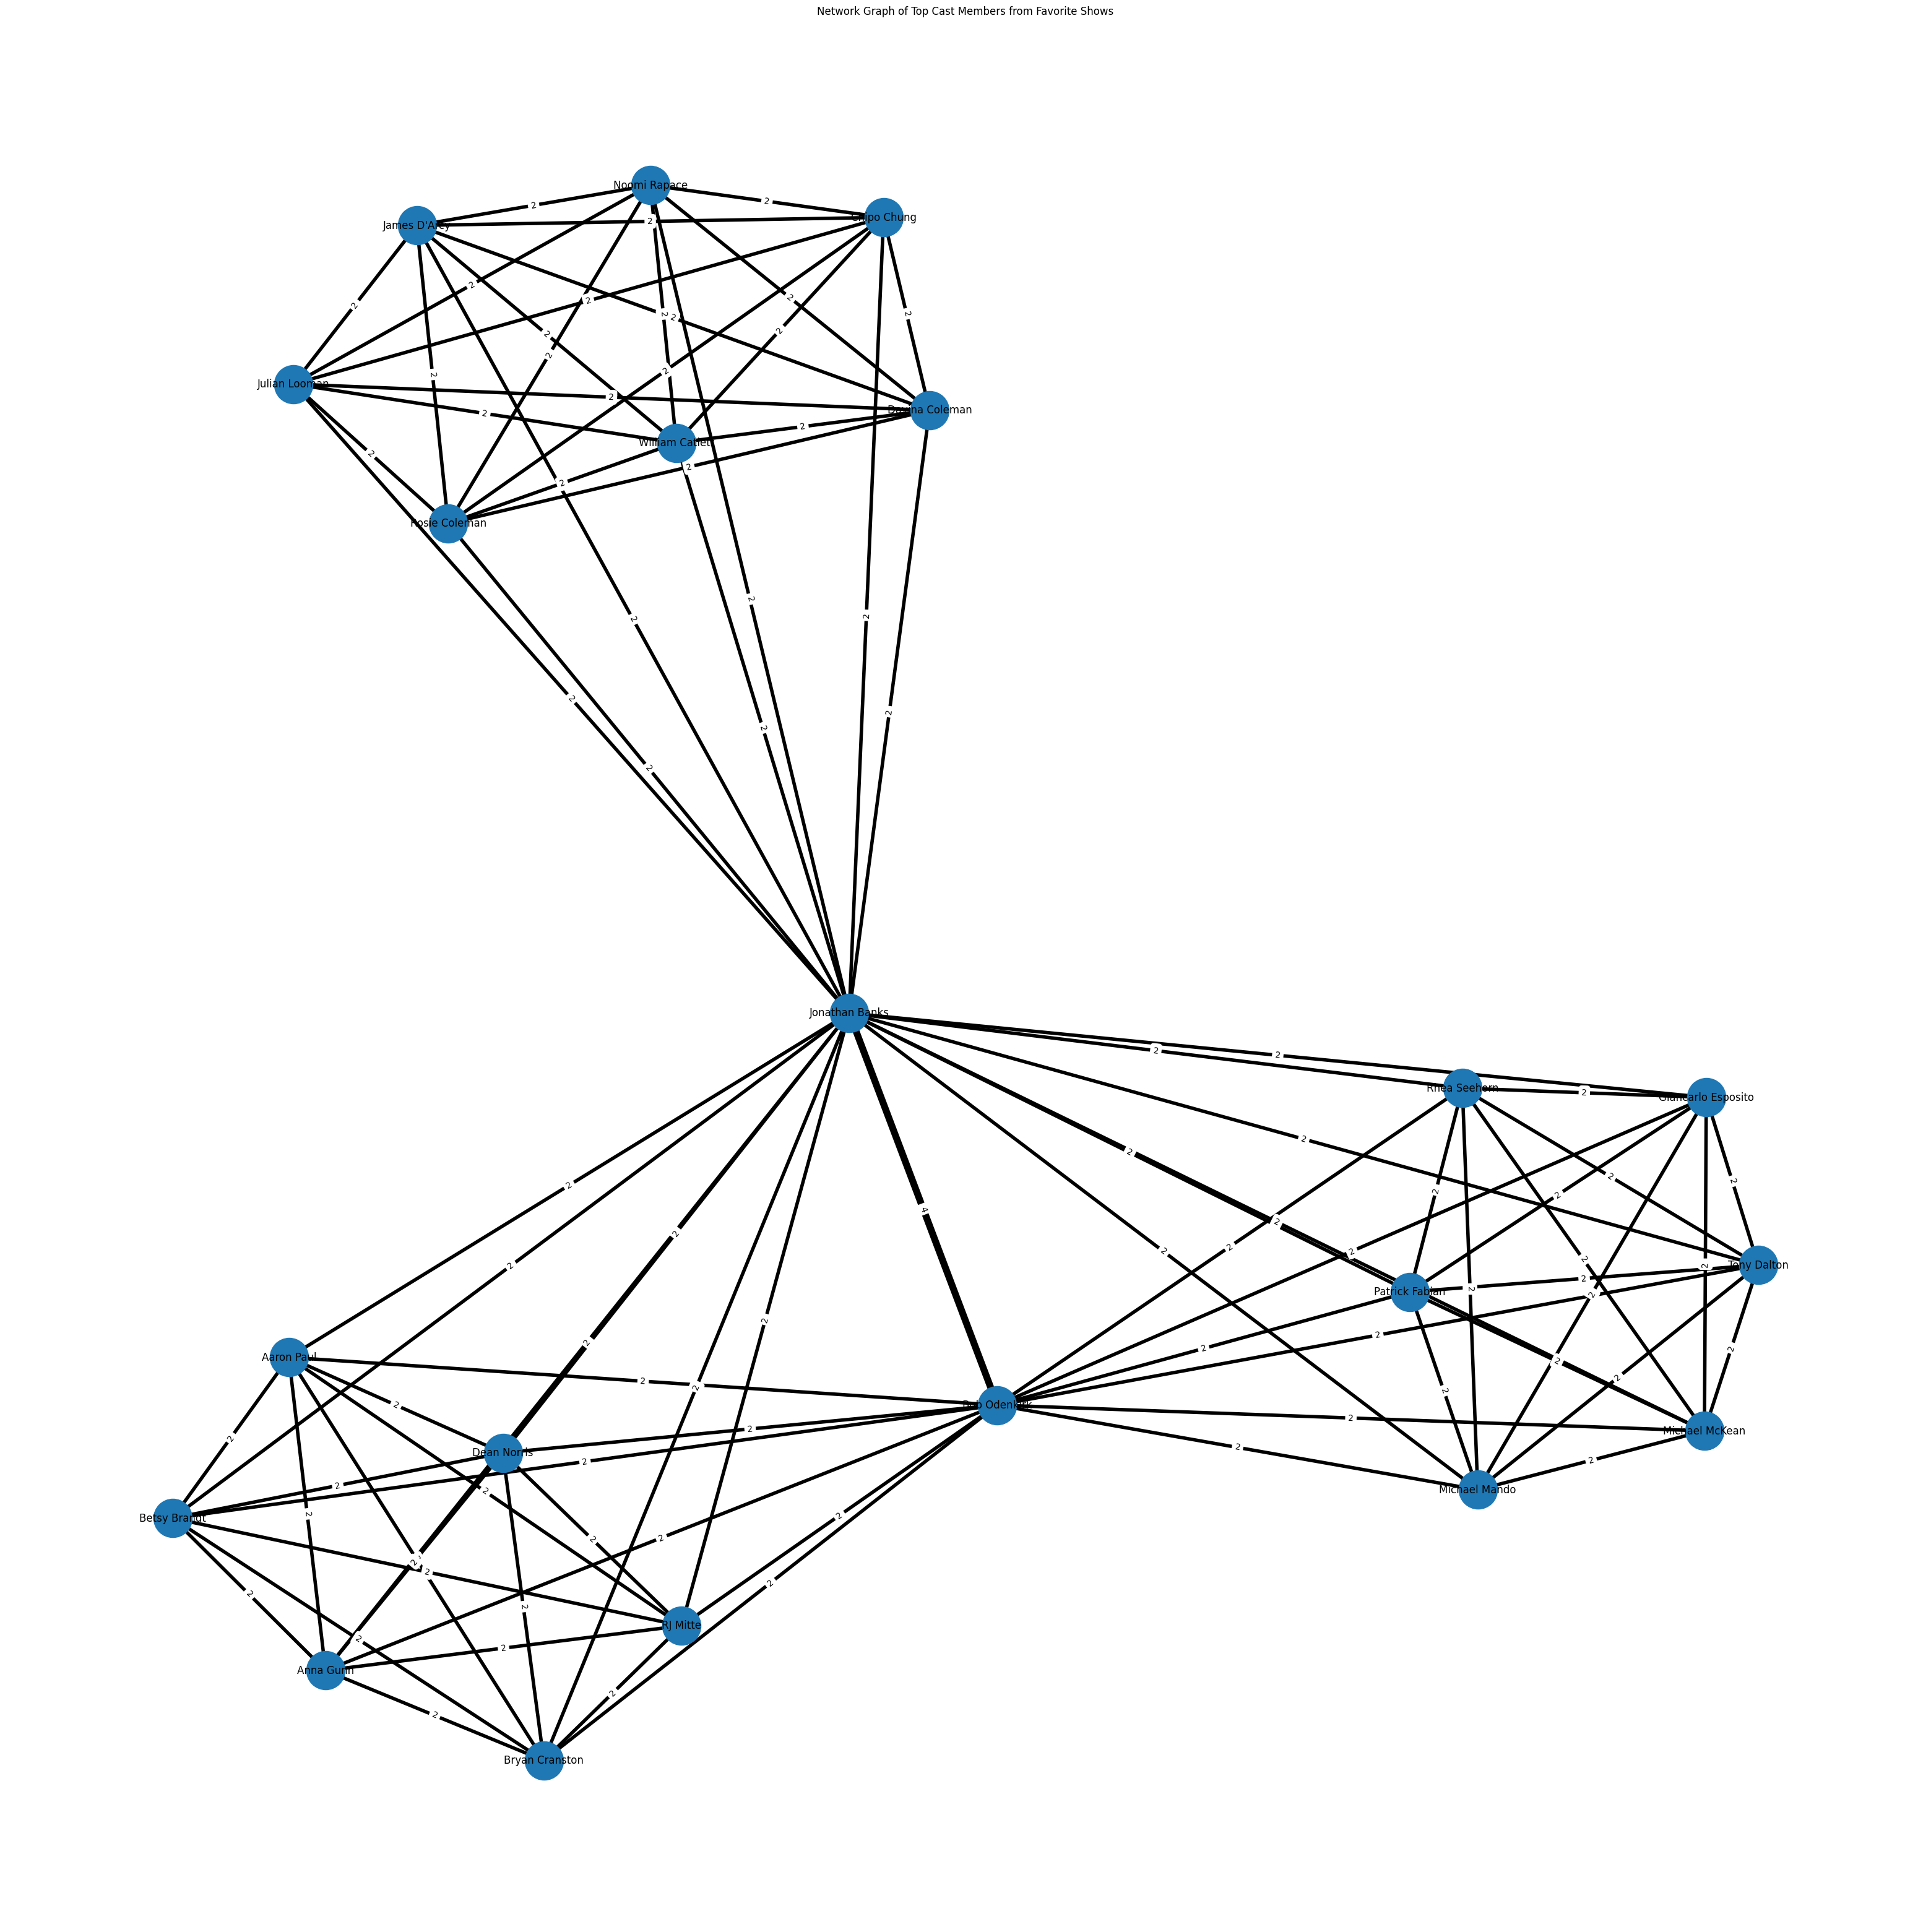

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of favorite TV shows
favorite_shows = ["Breaking Bad", "Better Call Saul","Constellation"]

# Initialize graph
G = nx.Graph()

# Process each show if it is in the favorite list
for index, row in df.iterrows():
    show = row['Show']
    if show in favorite_shows:
        cast_details = row['Cast Details']

        # Extract top 5 cast based on episodes
        top_cast = sorted(cast_details.items(), key=lambda x: int(x[1].split('(')[-1].split()[0]), reverse=True)[:8]

        # Add cast as nodes and connect them
        for name, details in top_cast:
            G.add_node(name, show=show)
            for other_name, other_details in top_cast:
                if name != other_name:
                    if G.has_edge(name, other_name):
                        # Increase weight by 1 if edge already exists
                        G[name][other_name]['weight'] += 1
                    else:
                        # Add new edge with weight 1
                        G.add_edge(name, other_name, weight=1)

# Draw the network graph
plt.figure(figsize=(40, 40))
pos = nx.spring_layout(G)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=2000)

# Edges with weights visualized as labels and varied thickness
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, width=[v['weight']*2 for (r, c, v) in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Network Graph of Top Cast Members from Favorite Shows")
plt.axis('off')  # Turn off the axis
plt.show()


In [ ]:
#NETWORK GRAPH FOR CREW

In [ ]:
'''
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of favorite TV shows
favorite_shows = ["Breaking Bad"]

# Initialize graph
G = nx.Graph()

# Process each show if it is in the favorite list
for index, row in df.iterrows():
    show = row['Show']
    if show in favorite_shows:
        crew_details = row['Crew Details']

        # Filter to get only exact "Producer" role
        producers = {}
        for person, details in crew_details.items():
            roles = details.split(',')
            for role in roles:
                if 'Producer (' in role and 'Co-' not in role and 'Supervising' not in role and 'Associate' not in role:
                    episode_count = int(role.split('(')[-1].split()[0])
                    producers[person] = episode_count

        # Extract top 5 producers based on episodes
        top_producers = sorted(producers.items(), key=lambda x: x[1], reverse=True)[:5]

        # Add producers as nodes and connect them, include episode count in node attributes
        for name, episode_count in top_producers:
            G.add_node(name, show=show, role='Producer', episodes=episode_count)
            for other_name, other_episode_count in top_producers:
                if name != other_name:
                    if G.has_edge(name, other_name):
                        # Increase weight by 1 if edge already exists
                        G[name][other_name]['weight'] += 1
                    else:
                        # Add new edge with weight 1
                        G.add_edge(name, other_name, weight=1)

# Draw the network graph
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=2000)

# Edges with weights visualized as labels and varied thickness
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, width=[v['weight']*2 for (r, c, v) in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Custom node labels to include episode counts
node_labels = {node: f"{node} ({data['episodes']} Episodes)" for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_family="sans-serif")

plt.title("Network Graph of Top Producers from Favorite Shows")
plt.axis('off')  # Turn off the axis
plt.show()
'''

'\nimport pandas as pd\nimport networkx as nx\nimport matplotlib.pyplot as plt\n\n# List of favorite TV shows\nfavorite_shows = ["Breaking Bad"]\n\n# Initialize graph\nG = nx.Graph()\n\n# Process each show if it is in the favorite list\nfor index, row in df.iterrows():\n    show = row[\'Show\']\n    if show in favorite_shows:\n        crew_details = row[\'Crew Details\']\n\n        # Filter to get only exact "Producer" role\n        producers = {}\n        for person, details in crew_details.items():\n            roles = details.split(\',\')\n            for role in roles:\n                if \'Producer (\' in role and \'Co-\' not in role and \'Supervising\' not in role and \'Associate\' not in role:\n                    episode_count = int(role.split(\'(\')[-1].split()[0])\n                    producers[person] = episode_count\n\n        # Extract top 5 producers based on episodes\n        top_producers = sorted(producers.items(), key=lambda x: x[1], reverse=True)[:5]\n\n        # Add

In [ ]:
#EXACT CREW NAME NETWORK GRAPH

In [ ]:
'''
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of favorite TV shows
favorite_shows = ["Breaking Bad"]

# Initialize graph
G = nx.Graph()

# Process each show if it is in the favorite list
for index, row in df.iterrows():
    show = row['Show']
    if show in favorite_shows:
        crew_details = row['Crew Details']

        # Filter to get only directors
        directors = {k: v for k, v in crew_details.items() if 'Director' in v.split(' (')[0].split(' / ')}

        # Extract top 5 directors based on episodes
        top_directors = sorted(directors.items(), key=lambda x: int(x[1].split('(')[-1].split()[0]), reverse=True)[:5]

        # Add directors as nodes and connect them
        for name, details in top_directors:
            G.add_node(name, show=show, role='Director')
            for other_name, other_details in top_directors:
                if name != other_name:
                    if G.has_edge(name, other_name):
                        # Increase weight by 1 if edge already exists
                        G[name][other_name]['weight'] += 1
                    else:
                        # Add new edge with weight 1
                        G.add_edge(name, other_name, weight=1)

# Draw the network graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=2000)

# Edges with weights visualized as labels and varied thickness
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, width=[v['weight']*2 for (r, c, v) in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Network Graph of Top Directors from Favorite Shows")
plt.axis('off')  # Turn off the axis
plt.show()
'''

'\nimport pandas as pd\nimport networkx as nx\nimport matplotlib.pyplot as plt\n\n# List of favorite TV shows\nfavorite_shows = ["Breaking Bad"]\n\n# Initialize graph\nG = nx.Graph()\n\n# Process each show if it is in the favorite list\nfor index, row in df.iterrows():\n    show = row[\'Show\']\n    if show in favorite_shows:\n        crew_details = row[\'Crew Details\']\n\n        # Filter to get only directors\n        directors = {k: v for k, v in crew_details.items() if \'Director\' in v.split(\' (\')[0].split(\' / \')}\n\n        # Extract top 5 directors based on episodes\n        top_directors = sorted(directors.items(), key=lambda x: int(x[1].split(\'(\')[-1].split()[0]), reverse=True)[:5]\n\n        # Add directors as nodes and connect them\n        for name, details in top_directors:\n            G.add_node(name, show=show, role=\'Director\')\n            for other_name, other_details in top_directors:\n                if name != other_name:\n                    if G.has_edge

In [ ]:
#Combined crew network graph

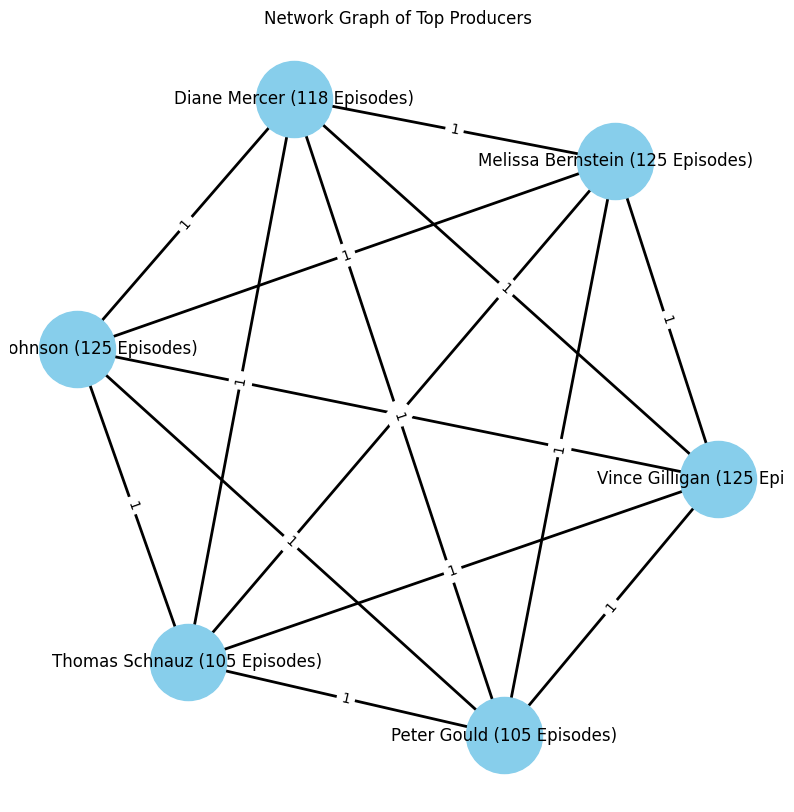

Vince Gilligan: 125 Episodes
Mark Johnson: 125 Episodes
Melissa Bernstein: 125 Episodes
Diane Mercer: 118 Episodes
Peter Gould: 105 Episodes
Thomas Schnauz: 105 Episodes


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# List of favorite TV shows
favorite_shows = ["Breaking Bad", "Better Call Saul"]  # Replace with the actual list of favorite shows

# Initialize graph
G = nx.Graph()

# Initialize a dictionary to hold the total episodes count for each producer
producer_episode_counts = defaultdict(int)

# Process each show if it is in the favorite list
for index, row in df.iterrows():
    show = row['Show']
    if show in favorite_shows:
        # If 'Crew Details' is already a dictionary, we can use it directly
        crew_details = row['Crew Details'] if isinstance(row['Crew Details'], dict) else ast.literal_eval(row['Crew Details'])

        # Aggregate the counts for each producer role
        for person, roles in crew_details.items():
            # Check if any of the roles contain the word 'Producer'
            if any("Producer" in role for role in roles.split('; ')):
                # Sum the episode counts for all producing roles
                for role in roles.split('; '):
                    if "Producer" in role:
                        # Extract the episode count from the role string
                        episode_count = int(role.split('(')[-1].split(' ')[0].replace(' Episodes)', ''))
                        producer_episode_counts[person] += episode_count

# Now we have a dictionary with each producer and their total number of episodes
# Let's sort this dictionary to get the top producers by episode count
top_producers_sorted = sorted(producer_episode_counts.items(), key=lambda x: x[1], reverse=True)

# We will consider top producers for the network graph
top_producers = top_producers_sorted[:6]

# Create a network graph with these producers
for producer, episode_count in top_producers:
    G.add_node(producer, episodes=episode_count, label=f"{producer} ({episode_count} Episodes)")
    for other_producer, other_episode_count in top_producers:
        if producer != other_producer:
            G.add_edge(producer, other_producer, weight=1)

# Draw the network graph with custom node labels including the number of episodes
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
node_labels = {node[0]: node[1]['label'] for node in G.nodes(data=True)}
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="skyblue")
nx.draw_networkx_labels(G, pos, labels=node_labels)
nx.draw_networkx_edges(G, pos, width=2)

# Edge weights as labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Network Graph of Top Producers')
plt.axis('off')
plt.show()

# Output the number of episodes for each top producer
for producer in top_producers:
    print(f"{producer[0]}: {producer[1]} Episodes")


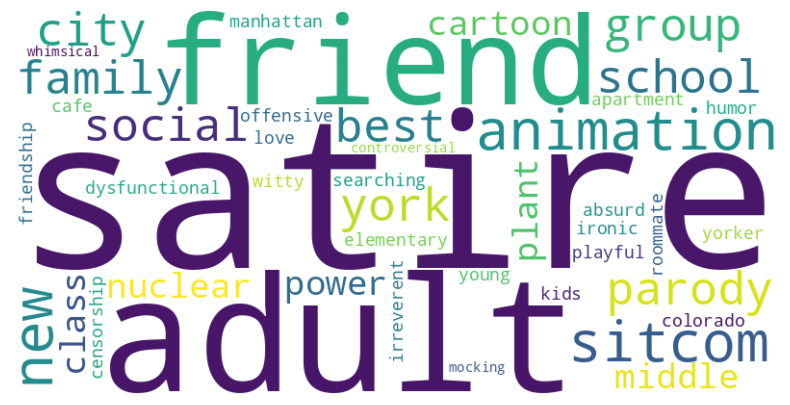

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define your favorite shows
favorite_shows = ["The Simpsons", "Friends", "South Park"]

# Filter the DataFrame to only include your favorite shows
filtered_df = df[df['Show'].isin(favorite_shows)]

# Combine all keywords into a single string
all_keywords = ', '.join(filtered_df['Keywords'].tolist())

# Remove single characters (length 1) from keywords
keywords_processed = ', '.join([word for word in all_keywords.split(', ') if len(word.strip()) > 1])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_processed)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
